In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [2]:
survey=pd.DataFrame(pd.read_csv("kaggle_survey_2020_responses.csv",skiprows=[1]))
del survey["Time from Start to Finish (seconds)"]
survey=survey.rename(columns={"Q1": "Age", "Q2": "Gender", "Q3":"Country","Q4":"Education","Q5":"Occupation","Q6":"Coding Experience"})

count_row_before = survey.shape[0] #silmeden önceki sayı
survey.dropna(subset = ["Occupation","Education","Coding Experience"], inplace=True)

count_row_after = survey.shape[0]
count_row=count_row_before - count_row_after
print("silinen satır sayısı:",count_row)
print("Satır Sayısı -->",survey.shape[0],"- Sütun Sayısı -->",survey.shape[1])

silinen satır sayısı: 916
Satır Sayısı --> 19120 - Sütun Sayısı --> 354


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

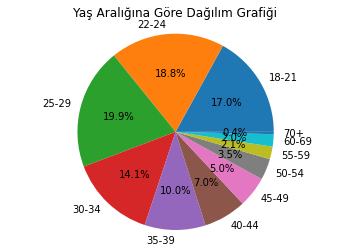

In [3]:
df = survey.groupby(['Age']).size()
plt.pie(df,labels=df.index,autopct='%1.1f%%')
plt.title('Yaş Aralığına Göre Dağılım Grafiği')
plt.axis('equal')
plt.show()

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [4]:
df = survey.groupby(['Country'])
df=df.get_group("Turkey")
df = df.groupby(['Education']).size()
df

Education
Bachelor’s degree                                                    129
Doctoral degree                                                       50
I prefer not to answer                                                 8
Master’s degree                                                      111
No formal education past high school                                   3
Professional degree                                                    6
Some college/university study without earning a bachelor’s degree     15
dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [5]:
df=survey.groupby(["Age", "Occupation"])["Age"].count().reset_index(name="Count")
df[["Age", "Occupation","Count"]].groupby("Age").apply(lambda df:df.sort_values("Count", ascending=False)
.head(1)).droplevel(0)


,Age,Occupation,Count
12,18-21,Student,2510
25,22-24,Student,1465
38,25-29,Student,669
44,30-34,Data Scientist,536
57,35-39,Data Scientist,356
70,40-44,Data Scientist,230
85,45-49,Other,143
98,50-54,Other,109
111,55-59,Other,81
124,60-69,Other,72


## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [6]:
## Soru 5.1:
df=survey.filter(regex='Q7')
yeni = df.select_dtypes(include=object).columns.tolist()
graf1=(pd.DataFrame(
    df[yeni]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(['counts'],ascending=[False]))
graf1


,,counts
column,value,
Q7_Part_1,Python,15530
Q7_Part_3,SQL,7535
Q7_Part_2,R,4277
Q7_Part_5,C++,3827
Q7_Part_6,Java,3367
Q7_Part_4,C,3315
Q7_Part_7,Javascript,2995
Q7_Part_11,MATLAB,2217
Q7_OTHER,Other,1945


In [7]:
## Soru 5.2:
df2=survey.groupby("Occupation")
df2=df2.get_group("Data Scientist")
df2=df2.filter(regex='Q7')
yeni = df2.select_dtypes(include=object).columns.tolist()
graf2=(pd.DataFrame(
    df2[yeni]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(['counts'],ascending=[False]))
graf2

,,counts
column,value,
Q7_Part_1,Python,2453
Q7_Part_3,SQL,1473
Q7_Part_2,R,975
Q7_Part_10,Bash,405
Q7_Part_5,C++,323
Q7_Part_6,Java,305
Q7_Part_7,Javascript,290
Q7_Part_4,C,247
Q7_OTHER,Other,245


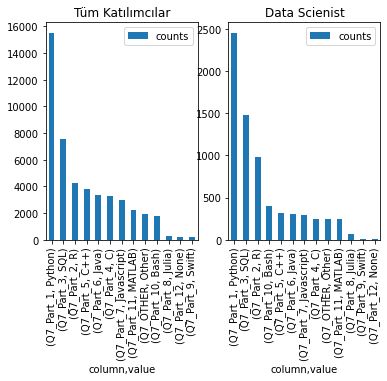

In [8]:
## Soru 5.3:
figure, axes = plt.subplots(1, 2)
graf1.plot(title="Tüm Katılımcılar",kind="bar",ax=axes[0])
graf2.plot(title="Data Scienist",kind="bar",ax=axes[1])

plt.show()


## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

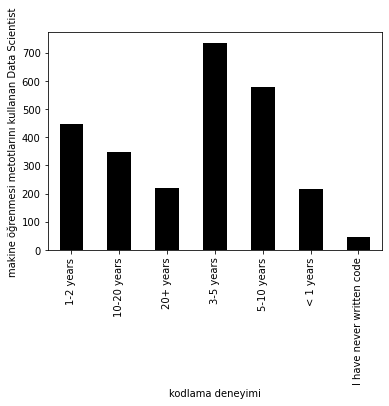

In [9]:
df = survey[survey["Occupation"] == "Data Scientist"]
df2 = df[df["Q15"] != 'I do not use machine learning methods']
df2.groupby("Coding Experience")["Q15"].size().plot(kind = 'bar',xlabel = 'kodlama deneyimi',ylabel = 'makine öğrenmesi metotlarını kullanan Data Scientist', color='black')
plt.show()

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [10]:
df = survey.filter(regex="Q16")
a=df[df.iloc[:,0].notna()] #a nın içersinde şu an sklearn kullananlar var 
b=a.iloc[:,1:] #Tüm 
c=b.dropna(how="all") #çıkartılacaklar   b/c 

df = a.reset_index().merge(c, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'].set_index('index')
df
index_list = list(df.index.values)
df=survey.loc[index_list]
df = df.filter(regex="Q17")
yeni = df.select_dtypes(include=object).columns.tolist()
graf2=(pd.DataFrame(
    df[yeni]
    .melt(value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(['counts'],ascending=[False]))

graf2


,,counts
variable,value,
Q17_Part_1,Linear or Logistic Regression,1683
Q17_Part_2,Decision Trees or Random Forests,1292
Q17_Part_4,Bayesian Approaches,428
Q17_Part_3,"Gradient Boosting Machines (xgboost, lightgbm, etc)",295
Q17_Part_7,Convolutional Neural Networks,138
Q17_Part_11,None,105
Q17_Part_6,"Dense Neural Networks (MLPs, etc)",68
Q17_Part_9,Recurrent Neural Networks,67
Q17_OTHER,Other,60


In [11]:
df = survey.filter(items=["Q16_Part_1","Q16_Part_2","Q16_Part_3"])
df.dropna(inplace=True)
df.value_counts()


Q16_Part_1       Q16_Part_2     Q16_Part_3
  Scikit-learn     TensorFlow    Keras        4406
dtype: int64

## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını ***(aralık olmayan değerler için ifadedeki değeri)*** maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [12]:
liste_spl=[element.split('-') for element in survey["Q24"].dropna().unique()]
listeorj=[]
for t in liste_spl:
  if len(t)== 1:
   listeorj.append(500000)
  else:
    x=int(t[0].replace(",", "").replace('$', '').replace('>','').replace(' ',''))
    y=int(t[1].replace(",", "").replace('$', '').replace('>','').replace(' ',''))
    z=(x+y)/2
    listeorj.append(z)



degisken=survey["Q24"].dropna().unique()
survey.loc[:,"Converted_Comp"]=np.nan
for i in range(len(degisken)):
  survey.loc[survey[survey.Q24==degisken[i]].index.tolist(),"Converted_Comp"]=listeorj[i]


In [13]:
import numpy as np
a=survey.groupby("Occupation")["Converted_Comp"].mean().sort_values(ascending=False)
a

Occupation
Product/Project Manager      62362.216949
Data Scientist               54477.821518
Data Engineer                50225.113821
Other                        46755.972149
DBA/Database Engineer        45872.276786
Research Scientist           45399.797665
Business Analyst             39512.040560
Software Engineer            38562.467901
Machine Learning Engineer    37625.320806
Statistician                 35626.520161
Data Analyst                 28840.373810
Currently not employed                NaN
Student                               NaN
Name: Converted_Comp, dtype: float64

In [14]:
print(f"Data Scientist {a.index.values.tolist().index('Data Scientist') + 1}. siradadir")

Data Scientist 2. siradadir


In [15]:
df=survey.loc[(survey["Occupation"]=="Data Scientist")]
df=df.groupby(by=['Country'], as_index=False)['Converted_Comp'].mean().sort_values(by="Converted_Comp",ascending=False).reset_index(drop=True)
df.head(10)


,Country,Converted_Comp
0,United States of America,142609.330110
1,Israel,111979.520000
2,Switzerland,109230.269231
3,Australia,104318.958333
4,United Kingdom of Great Britain and Northern I...,89749.504587
5,Germany,79804.195312
6,Ireland,78499.500000
7,Singapore,76937.000000
8,Canada,74466.481132
9,Thailand,73707.875000


In [16]:
df=survey.groupby("Q20")
df=df.get_group("10,000 or more employees")
toplama=df["Converted_Comp"].sum()
kisisayisi=df["Converted_Comp"].dropna().shape[0]
####
df=survey.groupby("Q20")
df=df.get_group("1000-9,999 employees")
toplama+=df["Converted_Comp"].sum()
kisisayisi+=df["Converted_Comp"].dropna().shape[0]
####
df=survey.groupby("Q20")
df=df.get_group("250-999 employees")
toplama+=df["Converted_Comp"].sum()
kisisayisi+=df["Converted_Comp"].dropna().shape[0]
ortalama=toplama/kisisayisi

print("250 den fazla çalışan bulunan kurumlardaki ortalama maaş-->",ortalama)

250 den fazla çalışan bulunan kurumlardaki ortalama maaş--> 56410.82901998097


In [17]:
df=survey.groupby("Country")
df=df.agg(['mean', 'std','median'])
df = df.sort_values(('Converted_Comp','mean'), ascending=False).reset_index(drop=False)
df.index+=1
df.index.name = 'Sıra'
df

Country  ... Converted_Comp
                                                         ...         median
Sıra                                                     ...               
1                              United States of America  ...       112499.5
2                                           Switzerland  ...       112499.5
3                                                Israel  ...        94999.5
4                                             Australia  ...        84999.5
5     United Kingdom of Great Britain and Northern I...  ...        64999.5
6                                               Germany  ...        64999.5
7                                                Canada  ...        74999.5
8                                           Netherlands  ...        64999.5
9                                  United Arab Emirates  ...        64999.5
10                                               Sweden  ...        54999.5
11                                              Belgium  ...        34999.5
12                                            Singapore  ...        54999.5
13                                               France  ...        44999.5
14                                              Ireland  ...        44999.5
15                                                Japan  ...        44999.5
16                                                Spain  ...        34999.5
17                                         South Africa  ...        27499.5
18                                                Italy  ...        34999.5
19                                          South Korea  ...        17499.5
20                                    Republic of Korea  ...        17499.5
21                                                China  ...        12499.5
22                                         Saudi Arabia  ...         6249.5
23                                                Other  ...        12499.5
24                                               Poland  ...        27499.5
25                                             Portugal  ...        27499.5
26                                               Mexico  ...        12499.5
27                                             Thailand  ...         9374.5
28                                                Ghana  ...         3499.5
29                                              Romania  ...        22499.5
30                                               Taiwan  ...        17499.5
31                                                Chile  ...        19999.5
32                                               Greece  ...        17499.5
33                                               Brazil  ...        12499.5
34                                             Malaysia  ...        12499.5
35                                               Russia  ...        12499.5
36                                                India  ...         6249.5
37                                              Ukraine  ...         8749.5
38                                            Argentina  ...        12499.5
39                                              Tunisia  ...          499.5
40                                               Turkey  ...         8749.5
41                                          Philippines  ...         6249.5
42                                                 Peru  ...         3999.5
43                                             Colombia  ...         6249.5
44                                              Belarus  ...         6249.5
45                                            Indonesia  ...         1499.5
46                                                Nepal  ...         3499.5
47                                              Morocco  ...          999.5
48                                             Pakistan  ...         1499.5
49                                             Viet Nam  ...         2499.5
50                                                Egypt  ...         1499.5
51                  

In [18]:
df.loc[(df["Country"]=="Turkey")]

Country Converted_Comp                      
                       mean           std  median
Sıra                                             
40    Turkey   16692.274096  43730.238109  8749.5

## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

In [19]:
## Doctor
df=survey.groupby("Education")
df=df.get_group("Doctoral degree")
df=df.groupby("Coding Experience")
doctor=df.mean()
doctor=doctor.reindex(['I have never written code', '< 1 years', '1-2 years',"3-5 years","5-10 years","10-20 years","20+ years"])
doctor
## Bach
df=survey.groupby("Education")
df=df.get_group("Bachelor’s degree")
df=df.groupby("Coding Experience")
bach=df.mean()
bach=bach.reindex(['I have never written code', '< 1 years', '1-2 years',"3-5 years","5-10 years","10-20 years","20+ years"])
bach
## Master
df=survey.groupby("Education")
df=df.get_group("Master’s degree")
df=df.groupby("Coding Experience")
master=df.mean()
master=master.reindex(['I have never written code', '< 1 years', '1-2 years',"3-5 years","5-10 years","10-20 years","20+ years"])


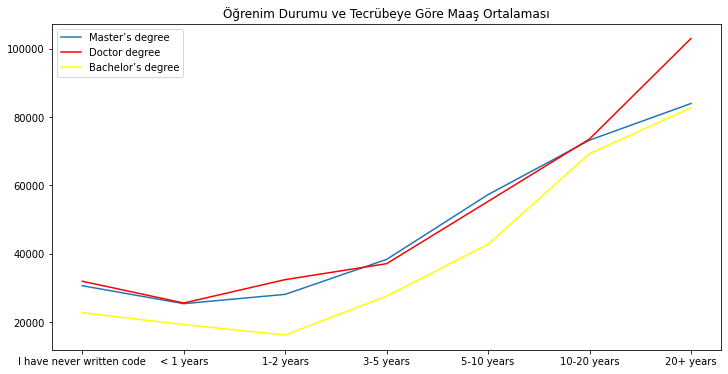

In [20]:
plt.figure(figsize=(12,6))
plt.plot(master,label="Master’s degree") 
plt.plot(doctor,color="red",label="Doctor degree") 
plt.plot(bach,color="yellow",label="Bachelor’s degree")
plt.title("Öğrenim Durumu ve Tecrübeye Göre Maaş Ortalaması")
plt.legend()
plt.show()

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

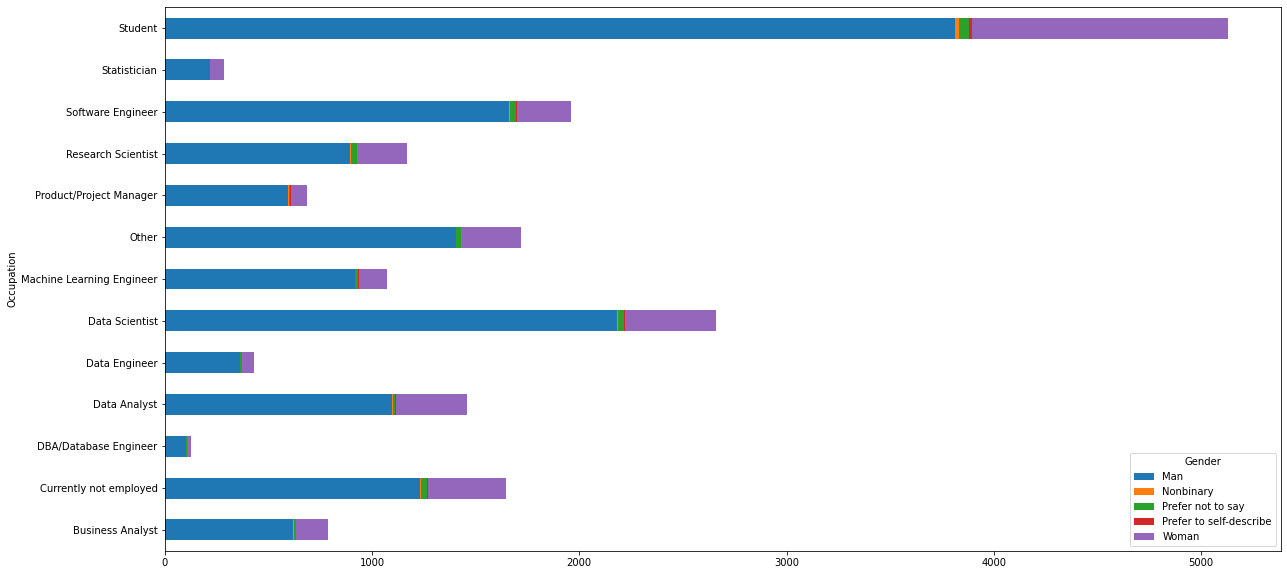

In [21]:
woman_ratio = survey.pivot_table(index='Occupation', columns='Gender', aggfunc='size', fill_value=0)
sums = woman_ratio[['Man', 'Nonbinary',"Prefer not to say","Prefer to self-describe","Woman"]].sum(axis=1)
oranlar = round(100 * woman_ratio['Woman'] / sums , 1)
woman_ratio.plot.barh(figsize=(20,10),stacked=True);

In [22]:
woman_ratio = survey.pivot_table(index='Occupation', columns='Gender', aggfunc='size', fill_value=0)
sums = woman_ratio[['Man', 'Nonbinary',"Prefer not to say","Prefer to self-describe","Woman"]].sum(axis=1)
oranlar = round(100 * woman_ratio['Woman'] / sums , 1)
oranlar.sort_values(ascending=False)

Occupation
Student                      24.0
Statistician                 23.7
Data Analyst                 23.5
Currently not employed       22.7
Research Scientist           20.3
Business Analyst             19.3
Other                        16.8
Data Scientist               16.4
Data Engineer                13.9
Software Engineer            13.3
DBA/Database Engineer        12.8
Machine Learning Engineer    12.6
Product/Project Manager      11.4
dtype: float64

In [23]:
ratio = survey.pivot_table(index='Occupation', columns='Gender', aggfunc='size', fill_value=0)
ratio=ratio.loc["Currently not employed"]
sums=survey.loc[survey["Gender"]=="Man"].shape[0]
oranlar_Erkek = round(100 * ratio['Man'] / sums , 1)
sums=survey.loc[survey["Gender"]=="Woman"].shape[0]
oranlar_Kadin = round(100 * ratio['Woman'] / sums , 1)
print("Erkek İşsiz Oranı-->",oranlar_Erkek)
print("---------------")
print("Kadın İşsiz Oranı -->",oranlar_Kadin)

Erkek İşsiz Oranı--> 8.2
---------------
Kadın İşsiz Oranı --> 10.1


## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [24]:
df=survey.loc[:,["Coding Experience","Gender","Country"]]
df=df.loc[(df["Coding Experience"] == "5-10 years")  | (df["Coding Experience"] == "10-20 years") | (df["Coding Experience"] == "20+ years")| (df["Coding Experience"] == "3-5 years")]
df=df.loc[df["Gender"]=="Woman"]
df=df.groupby("Country").size().sort_values(ascending=False)
print(f"Kadin katilimci sayisinin en fazla oldugu ulke: {df.index[0]}")


Kadin katilimci sayisinin en fazla oldugu ulke: India


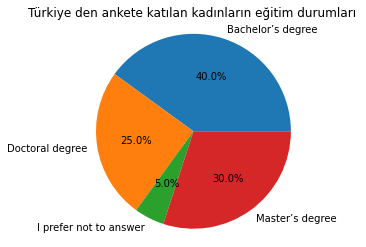

In [25]:
df=survey.loc[:,["Coding Experience","Gender","Country","Education"]]
df=df.loc[(df["Coding Experience"] == "5-10 years")  | (df["Coding Experience"] == "10-20 years") | (df["Coding Experience"] == "20+ years")| (df["Coding Experience"] == "3-5 years")]
df=df.loc[df["Gender"]=="Woman"]
df=df.loc[df["Country"]=="Turkey"]
df=df.groupby("Education").size()
plt.pie(df,labels=df.index,autopct='%1.1f%%')
plt.title('Türkiye den ankete katılan kadınların eğitim durumları')
plt.axis('equal')
plt.show()

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [26]:
survey.replace(to_replace ='\(.*?\)', value = '',inplace=True, regex = True)
survey.filter(like="Q39")

,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20029,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


In [27]:
df=survey.groupby("Age")
df=df.get_group("18-21")
df=df.filter(like="Q39")
yeni = df.select_dtypes(include=object).columns.tolist()
graf2=(pd.DataFrame(
    df[yeni]
    .melt(value_name='Social Media')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(['counts'],ascending=[False]))
graf2
print(f"18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu: {graf2.index[0][1]}")

18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu: Kaggle 


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [28]:
url ='https://download.geonames.org/export/dump/countryInfo.txt'
df = pd.read_csv(url, skiprows=49,sep='\t')
index_list=df.Country.to_list()
country_info=df.loc[:,["#ISO","Country","neighbours"]]
country_info


,#ISO,Country,neighbours
0,AD,Andorra,"ES,FR"
1,AE,United Arab Emirates,"SA,OM"
2,AF,Afghanistan,"TM,CN,IR,TJ,PK,UZ"
3,AG,Antigua and Barbuda,NaN
4,AI,Anguilla,NaN
...,...,...,...
247,ZA,South Africa,"ZW,SZ,MZ,BW,NA,LS"
248,ZM,Zambia,"ZW,TZ,MZ,CD,NA,MW,AO"
249,ZW,Zimbabwe,"ZA,MZ,BW,ZM"
250,CS,Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG"


In [29]:
country_info=country_info.rename(columns={'#ISO': 'Country Code'})
country_info=country_info.set_index('Country')
country_info.index

merged_survey=pd.merge(country_info, survey, on="Country")
merged_survey

,Country,Country Code,neighbours,Age,Gender,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Converted_Comp
0,United Arab Emirates,AE,"SA,OM",30-34,Man,Master’s degree,Research Scientist,5-10 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Jupyter,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84999.5
1,United Arab Emirates,AE,"SA,OM",40-44,Man,Professional degree,Other,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12499.5
2,United Arab Emirates,AE,"SA,OM",30-34,Man,Doctoral degree,Product/Project Manager,3-5 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Jupyter,NaN,NaN,NaN,NaN,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54999.5
3,United Arab Emirates,AE,"SA,OM",25-29,Man,Bachelor’s degree,Other,< 1 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Jupyter,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
4,United Arab Emirates,AE,"SA,OM",30-34,Man,Master’s degree,Software Engineer,< 1 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,Automated data augmentation,NaN,Automated model selection,Automated model architecture searches,Automated hyperparameter tuning,NaN,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,DataRobot AutoML,NaN,NaN,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,Polyaxon,Trains,NaN,NaN,NaN,64999.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS",22-24,Man,No formal education past high school,Student,< 1 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automated data augmentation,NaN,NaN,Automated model architecture searches,NaN,Automation of full ML pipelines,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,DataRobot AutoML,NaN,Auto-Keras,NaN,NaN,NaN,N

## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [30]:
df=merged_survey.loc[:,["Country","neighbours"]]
country_codes=df.loc[(df["Country"] == "Germany")]
country_codes=country_codes.neighbours.iloc[0]
country_codes=country_codes.split(",")
country_codes[:]

x=merged_survey["Country Code"].isin(country_codes) | (merged_survey["Country Code"]=="DE")
df=merged_survey[x]
df_genel=df.groupby("Country")["Education"].size()
df=df.loc[(df["Education"] == "Doctoral degree")]
df=df.groupby("Country")["Education"].size()
yeni=df/df_genel*100
yeni

Country
Belgium        22.033898
France         23.961661
Germany        25.848564
Netherlands    15.436242
Poland         15.172414
Switzerland    32.352941
Name: Education, dtype: float64